# Implementing Custom RandomSearchCV

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

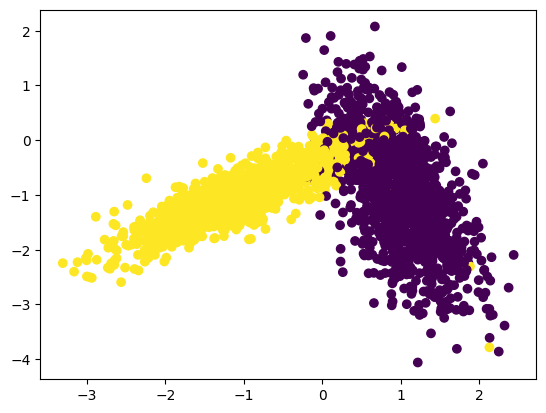

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [3]:
def MyRandomSearchCV(x_train, y_train, classifier, params, folds):

    """
    Custom Implementation of Random Search Cross validation with
    K Nearest neighbour as classifier
    """

    # initalizing train and test scores
    train_scores = [] 
    test_scores = []

    # determining split/chunk length
    chunk_len = len(x_train) // folds
    # with respect to chunk size divide the train variables 

    xtrain_chunks = [x_train[i:i+chunk_len, :] for i in range(0, len(x_train), chunk_len)]
    #  example = [[0:20], [20:40], [40:60], [60:80], [80:100]]
    ytrain_chunks = [y_train[i:i+chunk_len] for i in range(0, len(y_train), chunk_len)]

    for param in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            # concatenate train chunks
            x_train_ = np.concatenate(xtrain_chunks[:folds-1]) # if folds=4, 3 train chunks and 1 test chunk
            y_train_ = np.concatenate(ytrain_chunks[:folds-1])
            # print(x_train_.shape, y_train_.shape)
            x_test = xtrain_chunks[-1]
            y_test = ytrain_chunks[-1]
            # print(x_train, x_test)
            classifier.n_neighbors = param
            classifier.fit(x_train_,y_train_)

            Y_predicted = classifier.predict(x_test)
            testscores_folds.append(accuracy_score(y_test, Y_predicted))

            Y_predicted = classifier.predict(x_train_)
            trainscores_folds.append(accuracy_score(y_train_, Y_predicted))
        # rotate the train chunks http://stackoverflow.com/questions/9457832/ddg#9457864
            xtrain_chunks = xtrain_chunks[-1:] + xtrain_chunks[:-1]
            ytrain_chunks = ytrain_chunks[-1:] + ytrain_chunks[:-1]
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
    
    return train_scores, test_scores

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = sorted(np.random.randint(1, 50, 10))
folds = 3

trainscores,testscores = MyRandomSearchCV(X_train, y_train, neigh, params, folds)
 

100%|██████████| 10/10 [00:02<00:00,  4.77it/s]


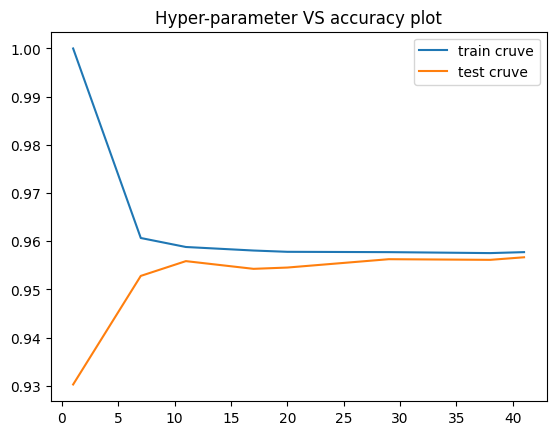

In [7]:
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [9]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

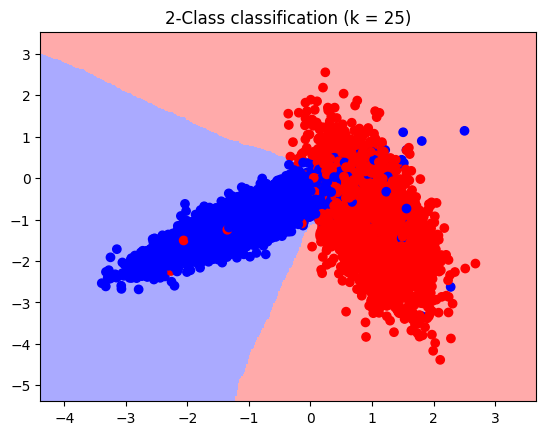

In [12]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 25) # initalize with best hyperparameter
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)